# Import Relevant Libraries

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Import and Explain Dataset

In [180]:
data = pd.read_csv('credit_risk_dataset.csv')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [181]:
data_num = data.select_dtypes(include='number')
print(f"There are total {data_num.shape[1]} numerical variables to use")
print(f"Those numerical columns are: {data_num.columns.tolist()}")
data_cat = data.select_dtypes(include=['object','category'])
print(f"There are total {data_cat.shape[1]} categorical variables to use")
print(f"Those categorical columns are: {data_cat.columns.tolist()}")

There are total 8 numerical variables to use
Those numerical columns are: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
There are total 4 categorical variables to use
Those categorical columns are: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


# Exploratory Data Analysis

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [183]:
data.shape

(32581, 12)

In [184]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<Axes: xlabel='loan_status', ylabel='count'>

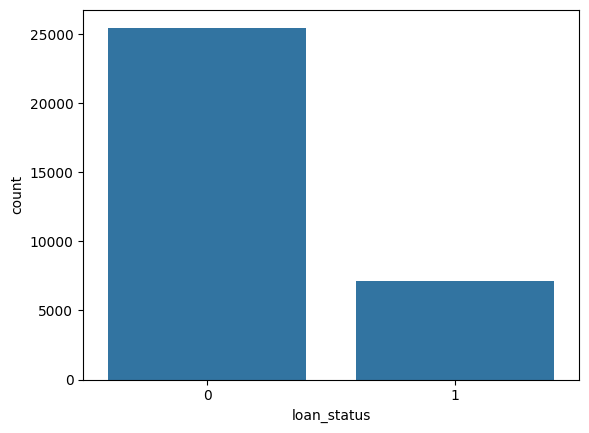

In [185]:
sns.countplot(x='loan_status',data= data)

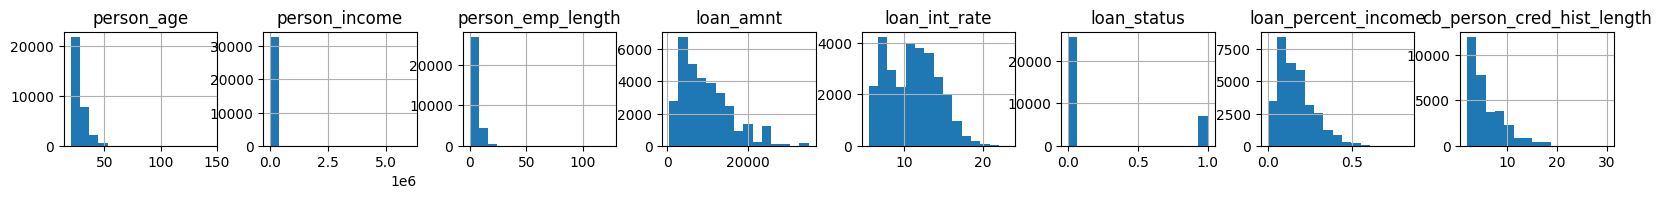

In [186]:
# Visualize distributions of features
data.hist(bins=15, figsize=(20, 15), layout=(8, 8))
plt.show()

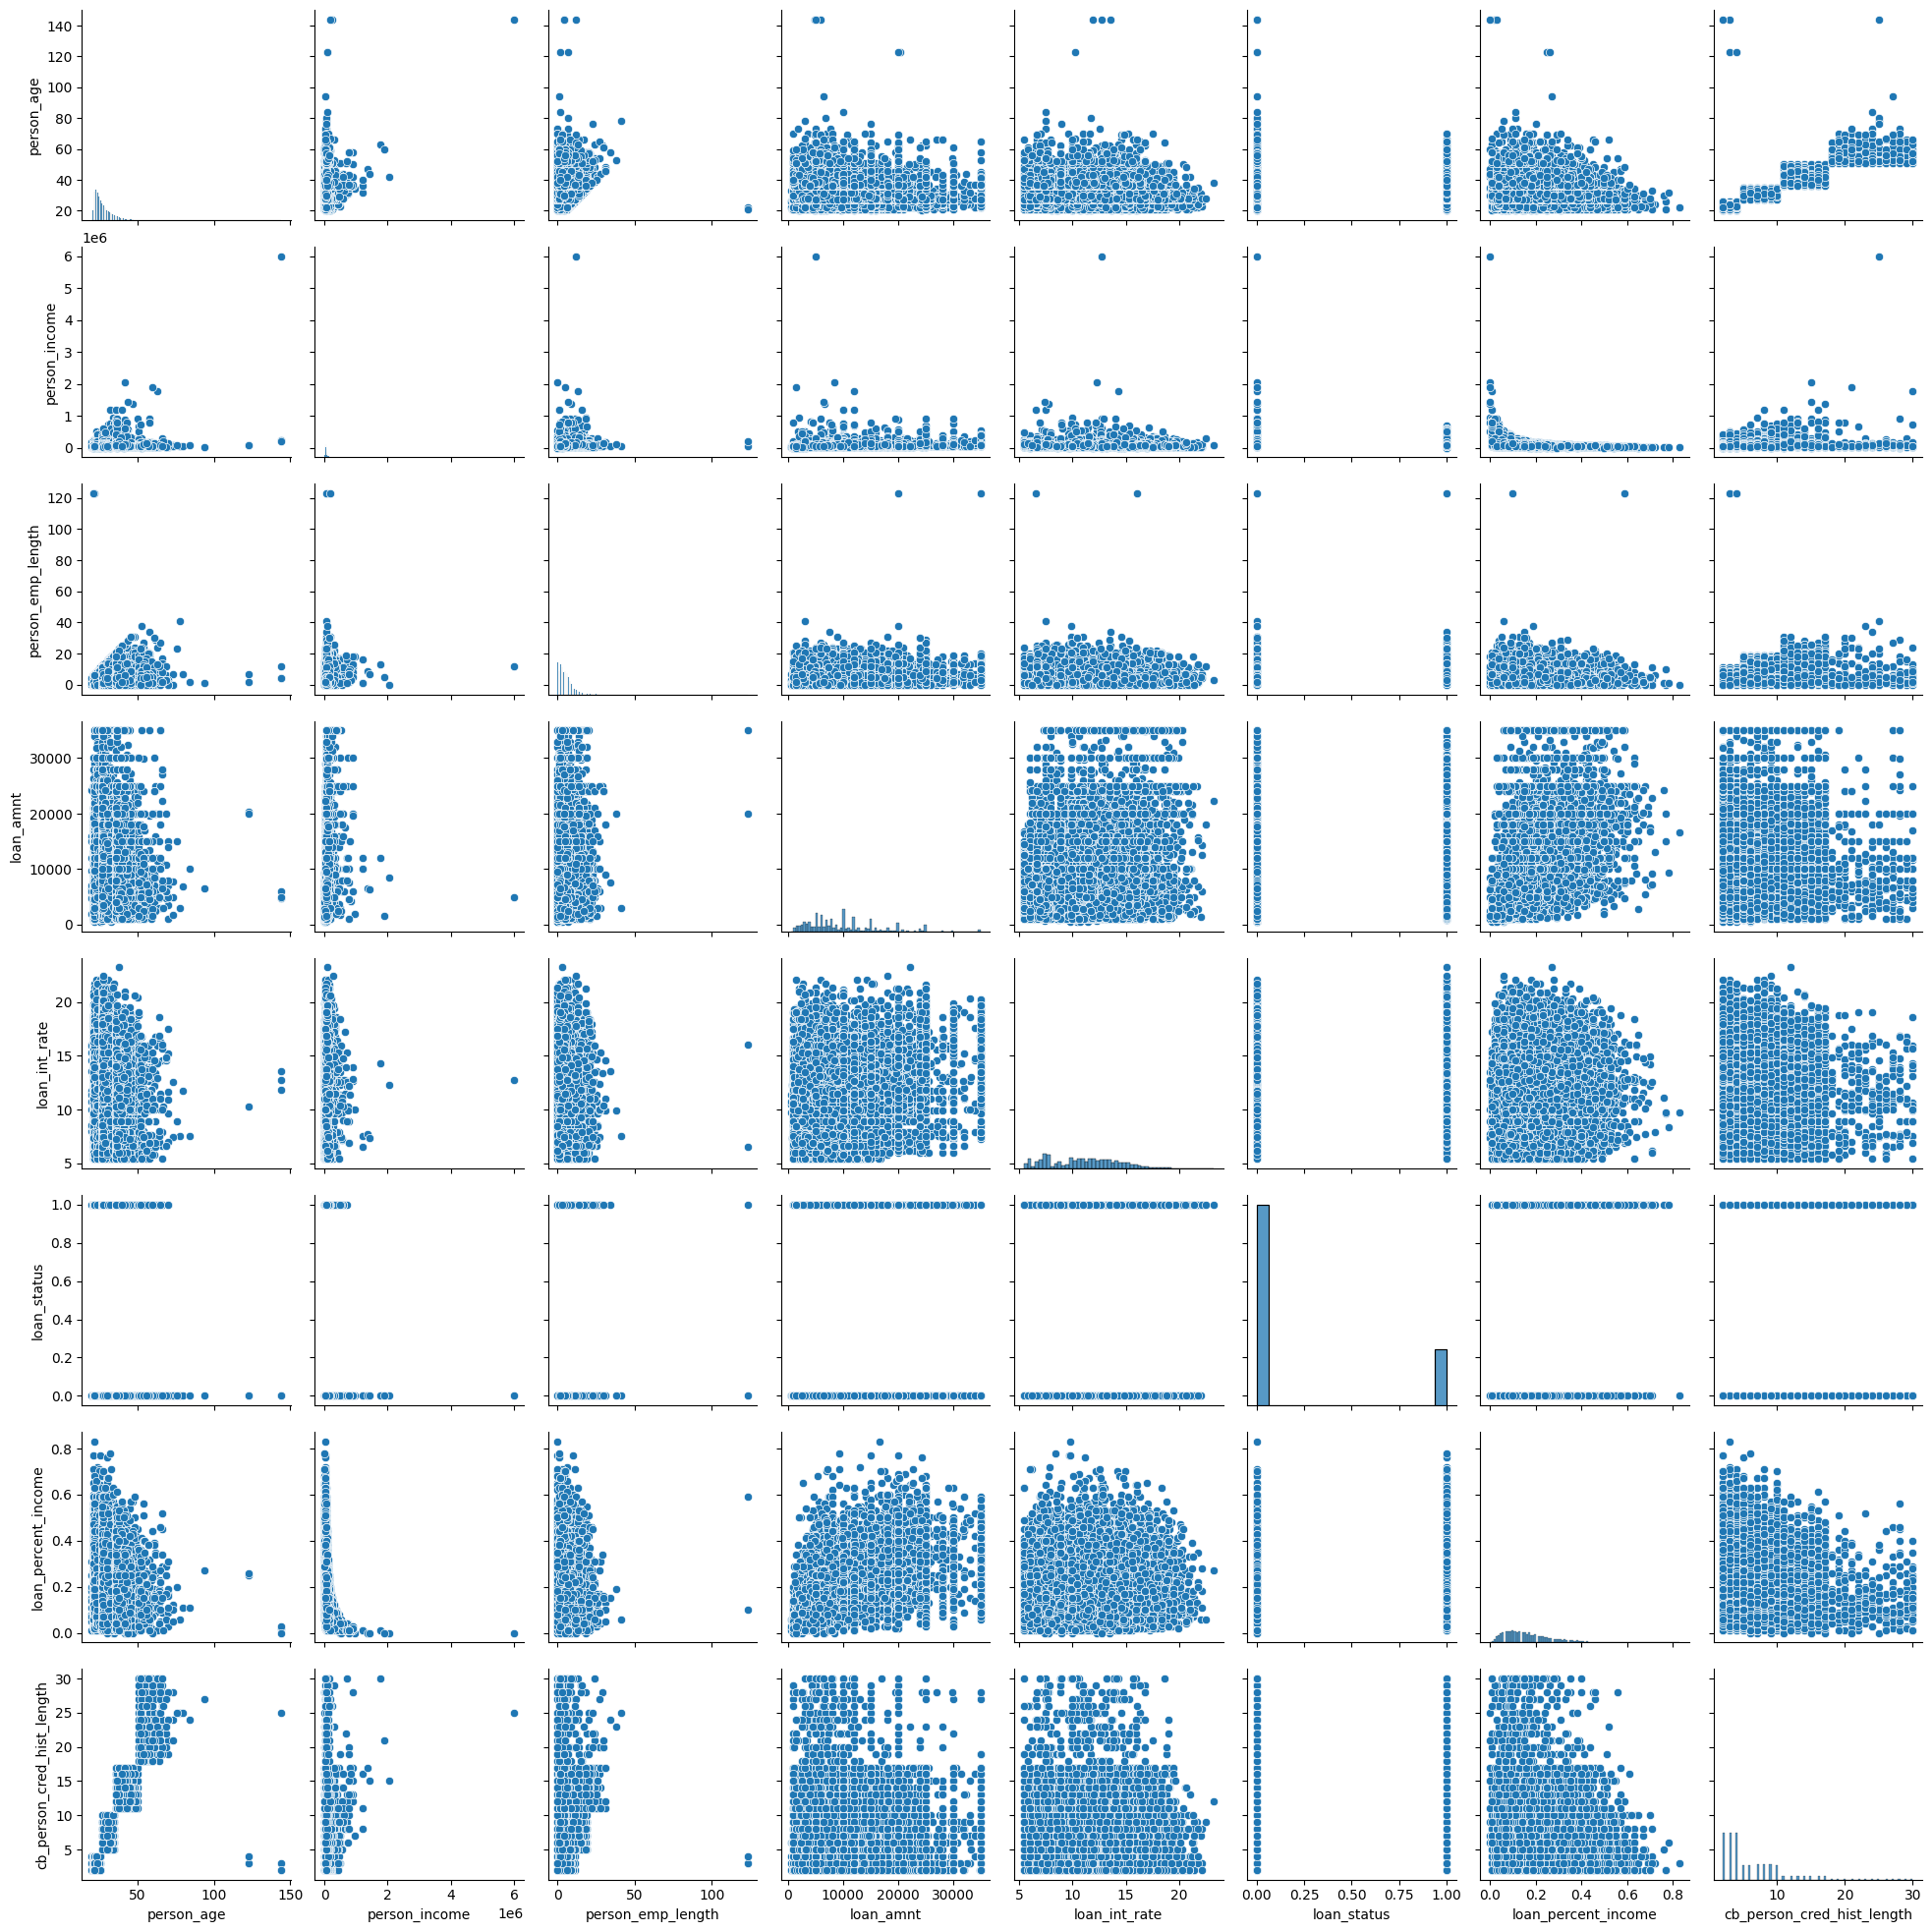

In [187]:
# Pair plot to visualize relationships between features
sns.pairplot(data)
plt.show()

#  Data Preprocessing

### Checking for missing values and handling missing values

In [188]:
print(data.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [189]:
# Check the mode, median for the two features
print('person_emp_length mode {}'.format(data['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(data['person_emp_length'].median()))
print('loan_int_rate mode {}'.format(data['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(data['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 7.51
loan_int_rate median 10.99


In [190]:
# Replace NaN values with mode/median, to ensure the outcome is more conservative
data['person_emp_length'].fillna(data['person_emp_length'].mode()[0], inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)

In [191]:
print(data.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [192]:
data.shape

(32581, 12)

### Checking for duplicates and handling them

In [193]:
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 165


In [194]:
# Display duplicate rows to review
print(data[data.duplicated(keep=False)])  # keep=False will show all duplicates, not just the first occurrence

       person_age  person_income person_home_ownership  person_emp_length  \
14             23         115000                  RENT                2.0   
238            22         183000              MORTGAGE                3.0   
252            24          85000                  RENT                5.0   
591            26          20000              MORTGAGE                5.0   
740            21          21600                   OWN                0.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [195]:
# Remove duplicate rows
data = data.drop_duplicates()

print(f"Data dimensions after duplicates removed: {data.shape}")

Data dimensions after duplicates removed: (32416, 12)


### Feature Encoding

In [196]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64

In [197]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64

In [198]:
data['loan_grade'].value_counts()

loan_grade
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: count, dtype: int64

In [199]:
data['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26686
Y     5730
Name: count, dtype: int64

In [200]:
data['person_emp_length'].value_counts()

person_emp_length
0.0      4973
2.0      3832
3.0      3442
5.0      2926
1.0      2897
4.0      2863
6.0      2652
7.0      2186
8.0      1676
9.0      1359
11.0      735
10.0      692
12.0      571
13.0      426
14.0      334
15.0      238
16.0      165
17.0      128
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

In [201]:
# Encoding binary categorical variables with label encoder
encoder= LabelEncoder()
data['loan_grade']=encoder.fit_transform(data['loan_grade'])

<ipython-input-201-cf699a90d69b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_grade']=encoder.fit_transform(data['loan_grade'])


In [202]:
# Encoding multi-categorical variables with one hot encoder
data = pd.get_dummies(data, columns=['cb_person_default_on_file', 'person_home_ownership', 'loan_intent'], drop_first=True)

In [203]:
data.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'cb_person_default_on_file_Y',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [204]:
data['loan_grade'].value_counts()

loan_grade
0    10703
1    10387
2     6438
3     3620
4      963
5      241
6       64
Name: count, dtype: int64

<Axes: >

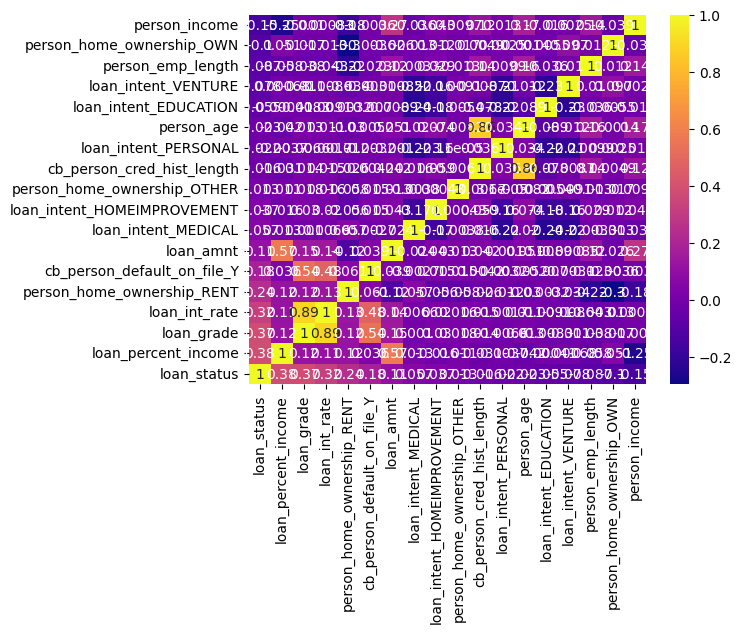

In [205]:
corr = data.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
sns.heatmap(corr,cmap='plasma',annot=True)

loan_status                    1.000000
loan_percent_income            0.379697
loan_grade                     0.373436
loan_int_rate                  0.320081
person_home_ownership_RENT     0.238132
cb_person_default_on_file_Y    0.179385
loan_amnt                      0.105736
loan_intent_MEDICAL            0.056667
loan_intent_HOMEIMPROVEMENT    0.036613
person_home_ownership_OTHER    0.012836
cb_person_cred_hist_length    -0.016498
loan_intent_PERSONAL          -0.021546
person_age                    -0.022698
loan_intent_EDUCATION         -0.055461
loan_intent_VENTURE           -0.078238
person_emp_length             -0.087331
person_home_ownership_OWN     -0.101916
person_income                 -0.145005
Name: loan_status, dtype: float64


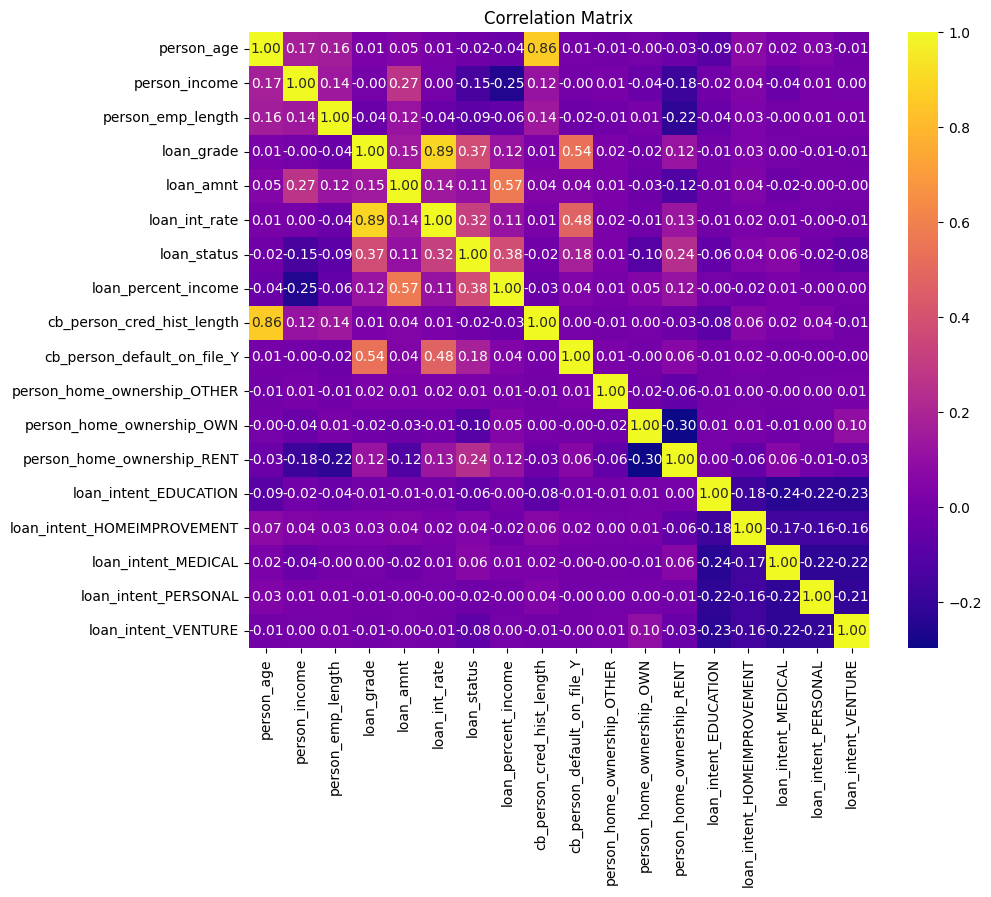

In [206]:
# Calculate Pearson correlation
correlation_matrix = data.corr()

# Extract and sort the correlations with the target variable
target_correlation = correlation_matrix['loan_status'].sort_values(axis = 0, ascending=False)

# Display correlations with the target variable
print(target_correlation)

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Model Development

### Train and test data split

In [260]:
data

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_Y,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,3,True,False,False,True,False,False,False,True,False
1,21,9600,5.0,1,1000,11.14,0,0.10,2,False,False,True,False,True,False,False,False,False
2,25,9600,1.0,2,5500,12.87,1,0.57,3,False,False,False,False,False,False,True,False,False
3,23,65500,4.0,2,35000,15.23,1,0.53,2,False,False,False,True,False,False,True,False,False
4,24,54400,8.0,2,35000,14.27,1,0.55,4,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0,0.11,30,False,False,False,False,False,False,False,True,False
32577,54,120000,4.0,0,17625,7.49,0,0.15,19,False,False,False,False,False,False,False,True,False
32578,65,76000,3.0,1,35000,10.99,1,0.46,28,False,False,False,True,False,True,False,False,False
32579,56,150000,5.0,1,15000,11.48,0,0.10,26,False,False,False,False,False,False,False,True,False


In [261]:
X= data.drop(['loan_status'],axis=1)
y= data['loan_status']

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling

In [263]:
# Initialize a scaler
scaler = StandardScaler()

# Scale data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [264]:
X_train

array([[ 1.29317753, -0.25551608, -0.39699661, ..., -0.47742477,
        -0.45218298, -0.46092289],
       [-1.05722254, -0.47032062,  0.09137454, ..., -0.47742477,
        -0.45218298,  2.16956031],
       [ 0.66640418,  0.18596725, -1.12955334, ..., -0.47742477,
        -0.45218298,  2.16956031],
       ...,
       [-0.27375585,  1.25434286, -0.88536777, ..., -0.47742477,
        -0.45218298, -0.46092289],
       [-0.27375585,  1.66643059, -1.12955334, ..., -0.47742477,
         2.21149409, -0.46092289],
       [ 1.1364842 , -0.01244536,  0.09137454, ..., -0.47742477,
        -0.45218298, -0.46092289]])

In [265]:
X_test

array([[ 0.50971084,  0.52174244, -0.64118219, ..., -0.47742477,
        -0.45218298,  2.16956031],
       [-1.05722254, -0.4362547 , -0.39699661, ...,  2.09457083,
        -0.45218298, -0.46092289],
       [-0.9005292 , -0.53137066, -0.64118219, ...,  2.09457083,
        -0.45218298, -0.46092289],
       ...,
       [-0.27375585, -0.63820822,  0.09137454, ...,  2.09457083,
        -0.45218298, -0.46092289],
       [-0.58714253, -0.68399574, -0.64118219, ...,  2.09457083,
        -0.45218298, -0.46092289],
       [-0.11706251,  0.11270721,  0.09137454, ..., -0.47742477,
         2.21149409, -0.46092289]])

### Model building

In [266]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3000, activation='relu', solver='adam', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
}

--- Logistic Regression with Original Features ---
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7569
           1       0.74      0.50      0.59      2156

    accuracy                           0.85      9725
   macro avg       0.81      0.72      0.75      9725
weighted avg       0.84      0.85      0.84      9725

AUC Score: 0.8668


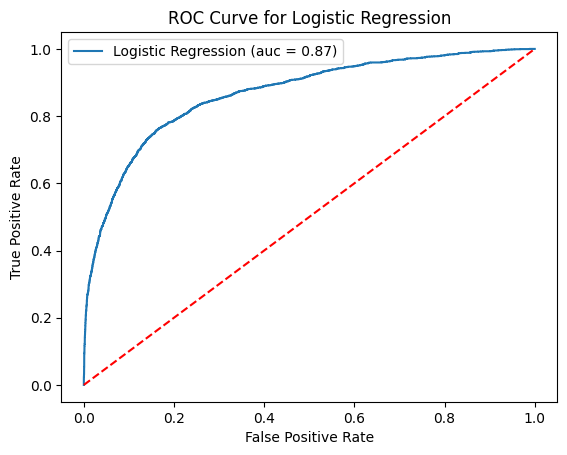

--- Decision Tree with Original Features ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7569
           1       0.73      0.76      0.75      2156

    accuracy                           0.88      9725
   macro avg       0.83      0.84      0.84      9725
weighted avg       0.89      0.88      0.89      9725

AUC Score: 0.8415


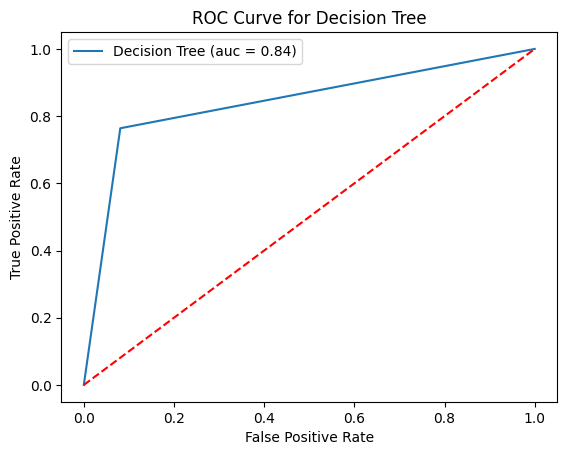

--- Naive Bayes with Original Features ---
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7569
           1       0.55      0.69      0.61      2156

    accuracy                           0.81      9725
   macro avg       0.73      0.76      0.74      9725
weighted avg       0.83      0.81      0.81      9725

AUC Score: 0.8361


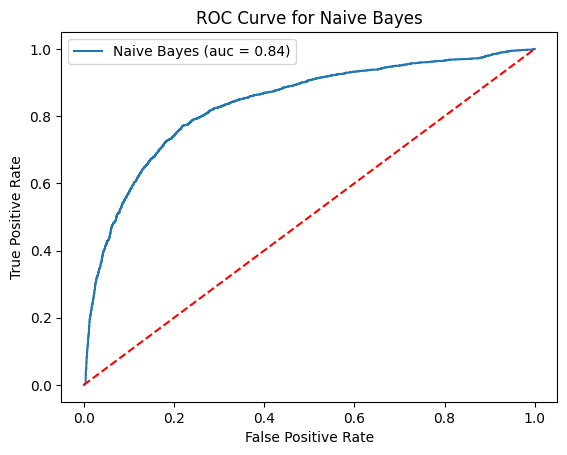

--- KNN with Original Features ---
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7569
           1       0.87      0.59      0.71      2156

    accuracy                           0.89      9725
   macro avg       0.88      0.78      0.82      9725
weighted avg       0.89      0.89      0.88      9725

AUC Score: 0.8619


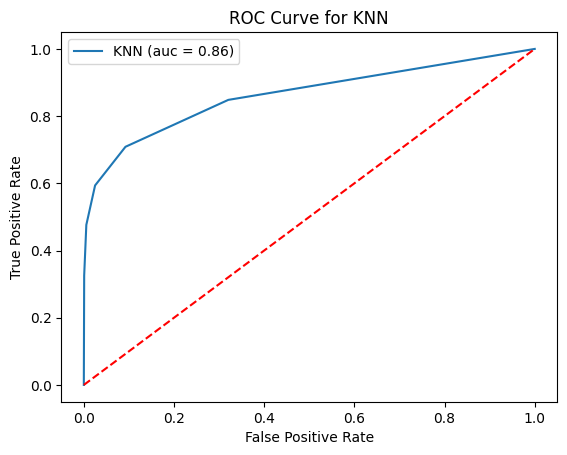

--- Neural Network with Original Features ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7569
           1       0.91      0.71      0.80      2156

    accuracy                           0.92      9725
   macro avg       0.92      0.84      0.87      9725
weighted avg       0.92      0.92      0.92      9725

AUC Score: 0.9192


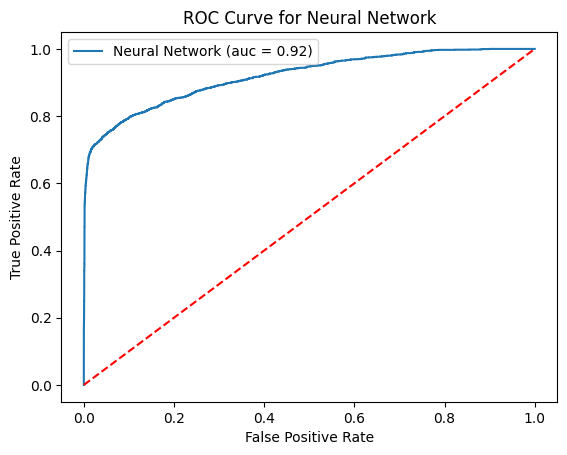

--- Random Forest with Original Features ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7569
           1       0.97      0.72      0.83      2156

    accuracy                           0.93      9725
   macro avg       0.95      0.86      0.89      9725
weighted avg       0.94      0.93      0.93      9725

AUC Score: 0.9326


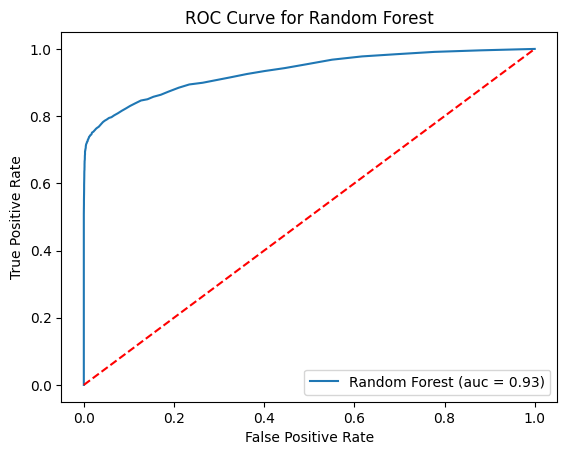

--- Gradient Boosting with Original Features ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7569
           1       0.94      0.70      0.81      2156

    accuracy                           0.92      9725
   macro avg       0.93      0.85      0.88      9725
weighted avg       0.93      0.92      0.92      9725

AUC Score: 0.9304


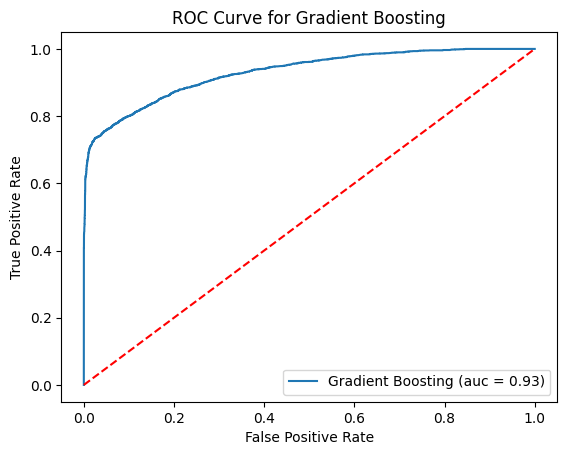

In [267]:
# Dictionary to store initial metrics
initial_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probabilities)
    initial_metrics[name] = {
        "Accuracy": accuracy_score(y_test, predictions),
        "AUC": auc
    }
    print(f"--- {name} with Original Features ---")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print(f"AUC Score: {auc:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (auc = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'ROC Curve for {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

In [292]:
# Dictionary to store metrics
model_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Gather metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']
    auc = roc_auc_score(y_test, y_proba)

    model_metrics[name] = {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    }

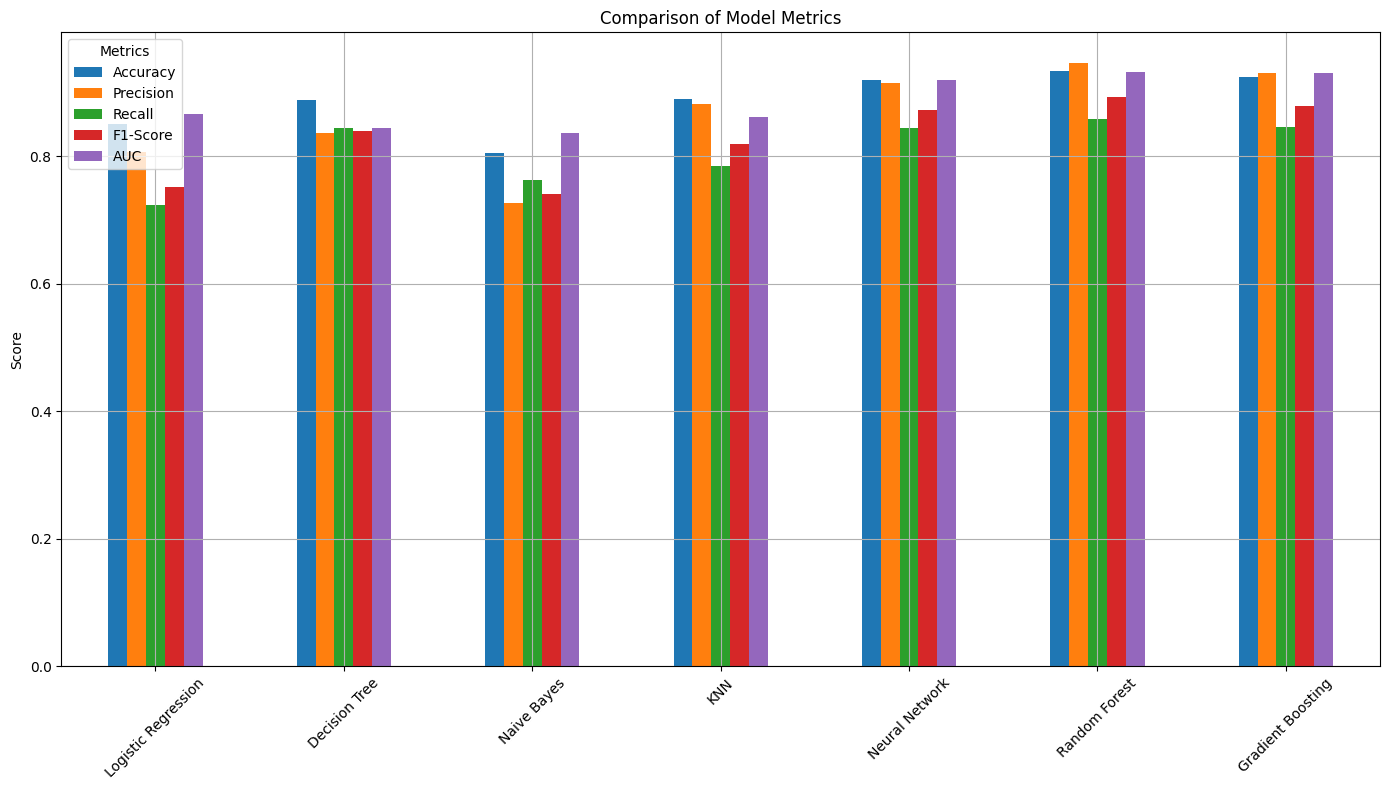

In [298]:
# Plotting the metrics
metrics_df = pd.DataFrame(model_metrics).T
fig, ax = plt.subplots(figsize=(14, 8))
metrics_df.plot(kind='bar', ax=ax)
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [269]:
print(metrics_df)

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.850283   0.806112  0.723537  0.751527  0.866757
Decision Tree        0.885141   0.831343  0.840964  0.835985  0.840964
Naive Bayes          0.805758   0.726799  0.763430  0.740673  0.836107
KNN                  0.890488   0.882618  0.784361  0.819454  0.861912
Neural Network       0.919589   0.915181  0.844187  0.873079  0.919214
Random Forest        0.933265   0.947073  0.858114  0.893166  0.932558
Gradient Boosting    0.924627   0.931227  0.845765  0.879387  0.930350


<Axes: >

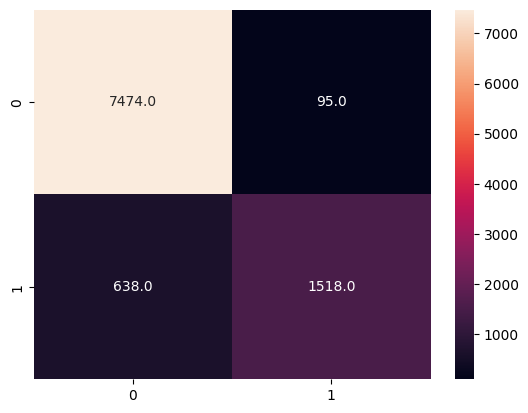

In [270]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.1f')

### Applying Recursive Feature Elimination (RFE)

In [271]:
selector_rfe = RFECV(LogisticRegression(max_iter=3000), step=1, cv=5)
selector_rfe.fit(X_train, y_train)

# Transform training and test set
X_train_rfe = selector_rfe.transform(X_train)
X_test_rfe = selector_rfe.transform(X_test)

### Applying Principal Component Analysis (PCA)

In [272]:
# Initialize PCA, choose min number of components to explain 95% of variance
pca = PCA(n_components=0.95)
pca.fit(X_train)

# Transform training and test set
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Model Building with new features after Feature Selection Methods have been applied

In [273]:
def evaluate_models(X_train, X_test, feature_method):
    metrics = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

        # Store performance metrics
        metrics[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "AUC": auc
        }

        print(f"--- {name} using {feature_method} ---")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"AUC Score: {auc:.4f}")

    return metrics

# Evaluate models using RFE-selected features
metrics_rfe = evaluate_models(X_train_rfe, X_test_rfe, "RFE")

# Evaluate models using PCA-transformed features
metrics_pca = evaluate_models(X_train_pca, X_test_pca, "PCA")


--- Logistic Regression using RFE ---
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7569
           1       0.74      0.50      0.60      2156

    accuracy                           0.85      9725
   macro avg       0.81      0.72      0.75      9725
weighted avg       0.84      0.85      0.84      9725

AUC Score: 0.8668
--- Decision Tree using RFE ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7569
           1       0.74      0.74      0.74      2156

    accuracy                           0.88      9725
   macro avg       0.83      0.83      0.83      9725
weighted avg       0.88      0.88      0.88      9725

AUC Score: 0.8304
--- Naive Bayes using RFE ---
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      7569
           1       0.56      0.6

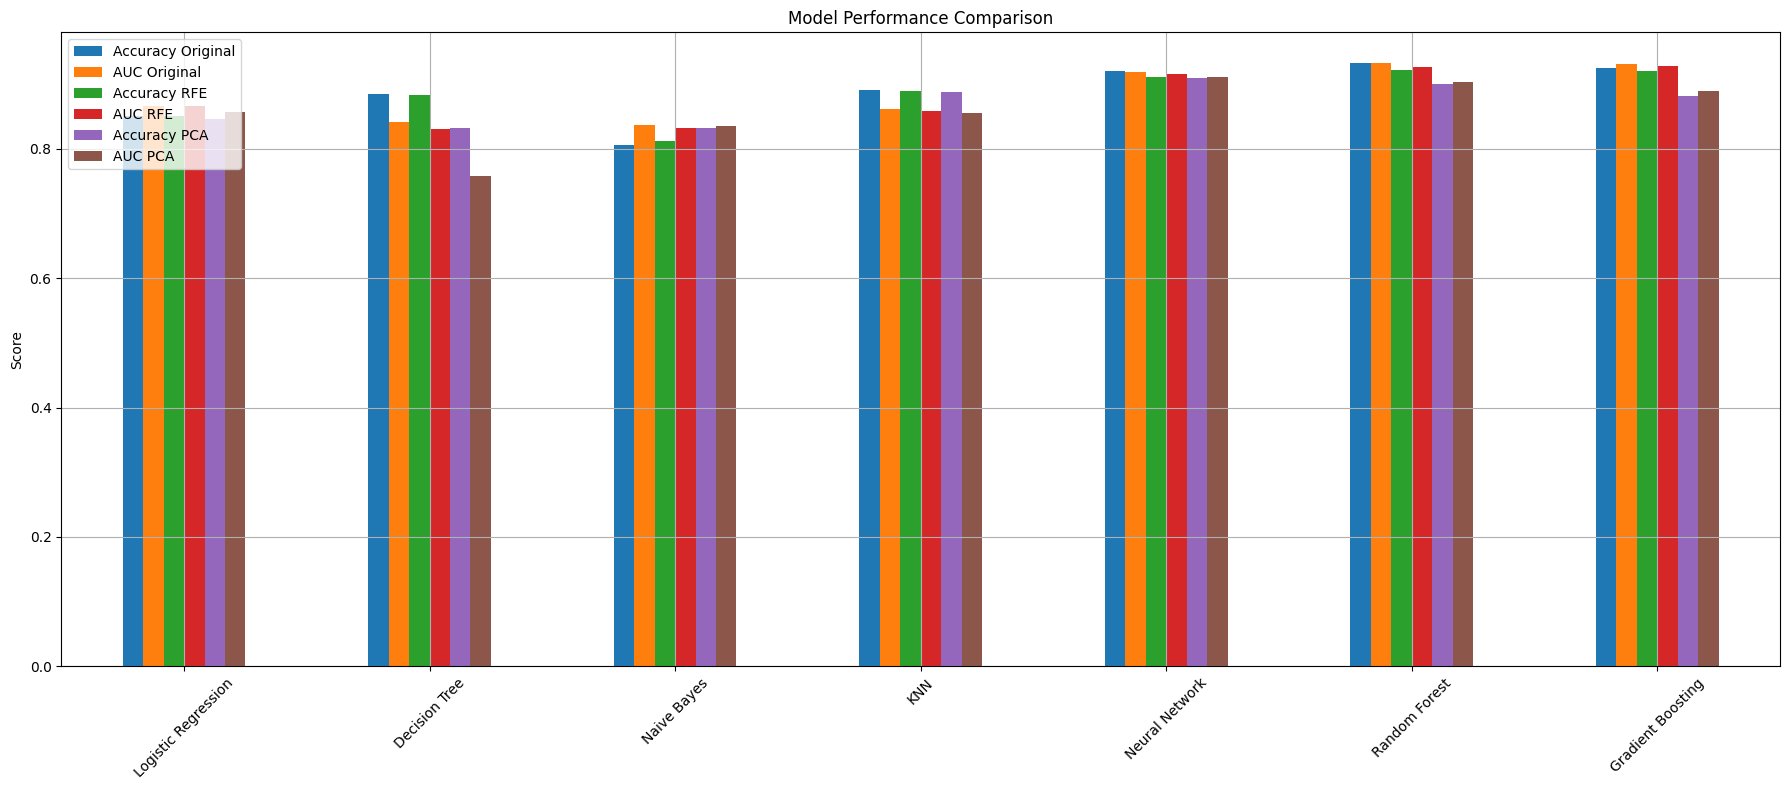

In [274]:
# Convert all metrics to DataFrames for easier manipulation and visualization
df_initial = pd.DataFrame(initial_metrics).T
df_metrics_rfe = pd.DataFrame(metrics_rfe).T
df_metrics_pca = pd.DataFrame(metrics_pca).T

# Combine into a single DataFrame for comparison
combined_metrics = pd.concat({
    'Original': df_initial,
    'RFE': df_metrics_rfe,
    'PCA': df_metrics_pca
}, axis=1)

# Plotting the comparisons
fig, axes = plt.subplots(figsize=(18, 8))
combined_metrics.plot(kind='bar', ax=axes)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend([f"{metric} {fs}" for fs in ['Original', 'RFE', 'PCA'] for metric in ['Accuracy', 'AUC']], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [275]:
models_names = ["Logistic Regression", "Decision Tree", "Naive Bayes", "KNN", "Neural Network", "Random Forest", "Gradient Boosting"]
methods = ["Original", "RFE", "PCA"]
metrics = ["Accuracy", "AUC"]

# Initialize an empty DataFrame
columns = pd.MultiIndex.from_product([metrics, methods], names=['Metric', 'Method'])
index = pd.Index(models_names, name='Model')
df_performance = pd.DataFrame(index=index, columns=columns)

# Populate the DataFrame
for model in models_names:
    df_performance.loc[model, ('Accuracy', 'Original')] = initial_metrics[model]['Accuracy']
    df_performance.loc[model, ('AUC', 'Original')] = initial_metrics[model]['AUC']
    df_performance.loc[model, ('Accuracy', 'RFE')] = metrics_rfe[model]['Accuracy']
    df_performance.loc[model, ('AUC', 'RFE')] = metrics_rfe[model]['AUC']
    df_performance.loc[model, ('Accuracy', 'PCA')] = metrics_pca[model]['Accuracy']
    df_performance.loc[model, ('AUC', 'PCA')] = metrics_pca[model]['AUC']

# Printing the DataFrame
print(df_performance)

Metric               Accuracy                           AUC            \
Method               Original       RFE       PCA  Original       RFE   
Model                                                                   
Logistic Regression  0.850283  0.850386  0.846272  0.866757  0.866773   
Decision Tree         0.88473  0.882879  0.832391  0.841529  0.830389   
Naive Bayes          0.805758  0.812648  0.831979  0.836107  0.831903   
KNN                  0.890488  0.889666  0.887095  0.861912   0.85804   
Neural Network       0.919589  0.911054  0.909923  0.919214  0.915489   
Random Forest        0.933265  0.921337   0.90036  0.932558  0.925915   
Gradient Boosting    0.924627  0.920308  0.881337  0.930352   0.92721   

Metric                         
Method                    PCA  
Model                          
Logistic Regression  0.856283  
Decision Tree        0.758481  
Naive Bayes          0.835282  
KNN                  0.855816  
Neural Network       0.911428  
Random Forest

# I will make use of the Original dataset pre feature selection for the following models;
Decision Tree, K Nearest Neigbours, Neural Network, Random Forest and Gradient Boosting

# I will make use of the dataset created during Recursive Feature Elimination (RFE) for the following models;
Logistic Regression

# I will make use of the dataset created during Principal Component Analysis(PCA) for the following models;
Naive Bayes


### Hyperparameter tuning for model with best perofrmance for optimal performance with RandomizedSearchCV

In [222]:
param_distributions_rfe = {
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    }
}

In [223]:
param_distributions = {
    "Decision Tree": {
        'max_depth': [None, 5, 10, 15, 20, 25, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8, 10]
    },
    "KNN": {
        'n_neighbors': range(1, 31),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    "Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
        'alpha': [0.0001, 0.001, 0.01],
        'activation': ['relu'],
        'solver': ['adam']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 10, 20, 30]
    }
}

In [228]:
# Initialize RandomizedSearchCV for each model with specific parameter distributions
search_objects = {}

# Using RFE data for Logistic Regression
search_objects['Logistic Regression'] = RandomizedSearchCV(
    LogisticRegression(max_iter=3000),
    param_distributions=param_distributions_rfe['Logistic Regression'],
    n_iter= 50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [231]:
%%time
# Using original data for other specified models
for model_name, params in param_distributions.items():
    search_objects[model_name] = RandomizedSearchCV(
        models[model_name],
        param_distributions=params,
        n_iter= 50,
        scoring='roc_auc',
        cv=5,
        random_state=42,
        n_jobs=-1
    )

  # Training data assignments based on feature selection method used for best performance
data_assignments = {
    'Logistic Regression': (X_train_rfe, X_test_rfe, y_train, y_test),
    'Decision Tree': (X_train, X_test, y_train, y_test),
    'KNN': (X_train, X_test, y_train, y_test),
    'Neural Network': (X_train, X_test, y_train, y_test),
    'Random Forest': (X_train, X_test, y_train, y_test),
    'Gradient Boosting': (X_train, X_test, y_train, y_test)
}

# Perform Randomized Search for each model
for model_name, search_object in search_objects.items():
    X_train_sel, X_test_sel, y_train_sel, y_test_sel = data_assignments[model_name]
    search_object.fit(X_train_sel, y_train_sel)
    best_score = search_object.best_score_
    best_params = search_object.best_params_
    print(f"Best ROC-AUC for {model_name} using {best_params}: {best_score:.4f}")

#Evaluate using the test set to check performance
best_model = search_object.best_estimator_
test_score = best_model.score(X_test_sel, y_test_sel)
print(f"Test accuracy for {model_name}: {test_score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best ROC-AUC for Logistic Regression using {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}: 0.8620
Best ROC-AUC for Decision Tree using {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 10}: 0.9109
Best ROC-AUC for KNN using {'weights': 'distance', 'n_neighbors': 30, 'metric': 'manhattan', 'algorithm': 'auto'}: 0.8937


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best ROC-AUC for Neural Network using {'solver': 'adam', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'relu'}: 0.9144
Best ROC-AUC for Random Forest using {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}: 0.9331


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best ROC-AUC for Gradient Boosting using {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}: 0.9496
Test accuracy for Gradient Boosting: 0.9356
CPU times: user 2min 27s, sys: 53 s, total: 3min 20s
Wall time: 2h 9min 30s


### Final Implementation of Models

Implementation of Logistic Regression with features selected by RFE and hyperparameters suggested through Randomized search

--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7569
           1       0.75      0.50      0.60      2156

    accuracy                           0.85      9725
   macro avg       0.81      0.72      0.75      9725
weighted avg       0.84      0.85      0.84      9725

AUC Score: 0.8667073069994761


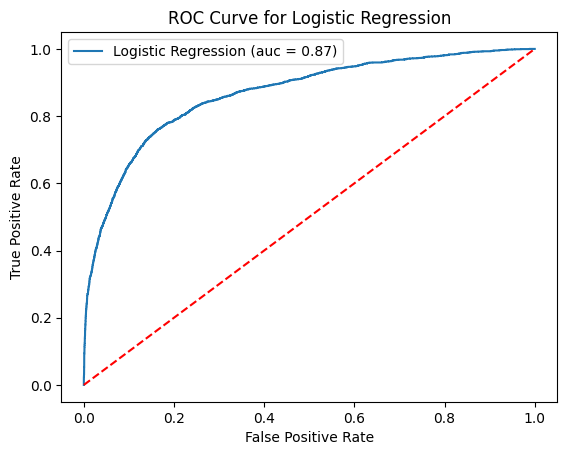

In [276]:
log_reg = LogisticRegression(solver= 'liblinear', penalty= 'l1', C= 0.1, max_iter=3000)
log_reg.fit(X_train_rfe, y_train)
log_pred = log_reg.predict(X_test_rfe)
log_prob = log_reg.predict_proba(X_test_rfe)[:, 1]
log_auc = roc_auc_score(y_test, log_prob)
log_report = classification_report(y_test, log_pred, output_dict=True)
log_name = 'Logistic Regression'
print(f"--- {log_name} ---")
print("Classification Report:")
print(classification_report(y_test, log_pred))
print(f"AUC Score: {log_auc}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"{log_name} (auc = {log_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.title(f'ROC Curve for {log_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [303]:
# Dictionary to store metrics
model_metrics_final = {}

# Gather metrics
log_accuracy = log_report['accuracy']
log_precision = log_report['macro avg']['precision']
log_recall = log_report['macro avg']['recall']
log_f1 = log_report['macro avg']['f1-score']
log_auc = roc_auc_score(y_test, log_prob)

model_metrics_final['Logistic Regression'] = {
    "Model": log_name,
    "Accuracy": log_accuracy,
    "Precision": log_precision,
    "Recall": log_recall,
    "F1-Score": log_f1,
    "AUC": log_auc
}

In [304]:
model_metrics_final

{'Logistic Regression': {'Model': 'Logistic Regression',
  'Accuracy': 0.850694087403599,
  'Precision': 0.8070541688467886,
  'Recall': 0.7239671460412075,
  'F1-Score': 0.7521028779639793,
  'AUC': 0.8667073069994761}}

Implementation of Naive Bayes  with features selected by PCA and hyperparameters suggested through Randomized search

--- Naive Bayes ---
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7569
           1       0.74      0.37      0.50      2156

    accuracy                           0.83      9725
   macro avg       0.79      0.67      0.70      9725
weighted avg       0.82      0.83      0.81      9725

AUC Score: 0.8352824086432036


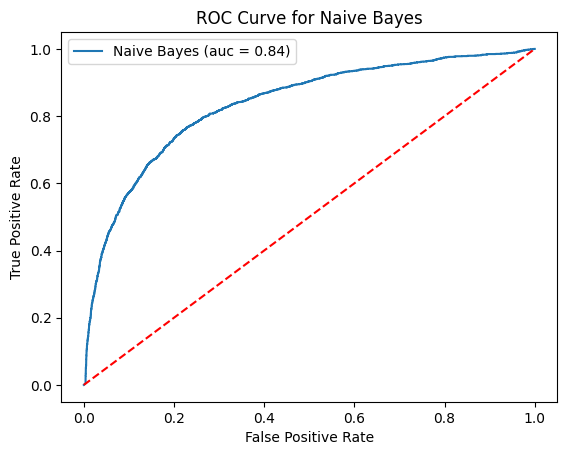

In [278]:
nb_reg = GaussianNB()
nb_reg.fit(X_train_pca, y_train)
nb_pred = nb_reg.predict(X_test_pca)
nb_prob = nb_reg.predict_proba(X_test_pca)[:, 1]
nb_auc = roc_auc_score(y_test, nb_prob)
nb_report = classification_report(y_test, nb_pred, output_dict=True)
nb_name = 'Naive Bayes'
print(f"--- {nb_name} ---")
print("Classification Report:")
print(classification_report(y_test, nb_pred))
print(f"AUC Score: {nb_auc}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, nb_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"{nb_name} (auc = {nb_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.title(f'ROC Curve for {nb_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [305]:
# Gather metrics
nb_accuracy = nb_report['accuracy']
nb_precision = nb_report['macro avg']['precision']
nb_recall = nb_report['macro avg']['recall']
nb_f1 = nb_report['macro avg']['f1-score']
nb_auc = roc_auc_score(y_test, nb_prob)

model_metrics_final['Naive Bayes'] = {
    "Model": nb_name,
    "Accuracy": nb_accuracy,
    "Precision": nb_precision,
    "Recall": nb_recall,
    "F1-Score": nb_f1,
    "AUC": nb_auc
}

In [306]:
model_metrics_final

{'Logistic Regression': {'Model': 'Logistic Regression',
  'Accuracy': 0.850694087403599,
  'Precision': 0.8070541688467886,
  'Recall': 0.7239671460412075,
  'F1-Score': 0.7521028779639793,
  'AUC': 0.8667073069994761},
 'Naive Bayes': {'Model': 'Naive Bayes',
  'Accuracy': 0.8319794344473008,
  'Precision': 0.792280697702221,
  'Recall': 0.6674960799727234,
  'F1-Score': 0.6972889860978844,
  'AUC': 0.8352824086432036}}

Implementation of Decision Tree, KNN, Neural Network, Random Forest and Gradient Boosting with original features as it had better accuracy and AUC than both feature selection methods applied and application of hyperparameters suggested through Randomized search

In [307]:
# Run models with optimized hyperparameters
models_final = {
    "Decision Tree": DecisionTreeClassifier(min_samples_split= 20, min_samples_leaf= 1, max_depth= 10),
    "KNN": KNeighborsClassifier(weights= 'distance', n_neighbors= 30, metric= 'manhattan', algorithm= 'auto'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3000, alpha= 0.01, activation='relu', solver='adam', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators= 300, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators= 300, max_depth= 5, learning_rate= 0.1)
}

--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7569
           1       0.95      0.71      0.81      2156

    accuracy                           0.93      9725
   macro avg       0.94      0.85      0.88      9725
weighted avg       0.93      0.93      0.92      9725

AUC Score: 0.9086946781018466


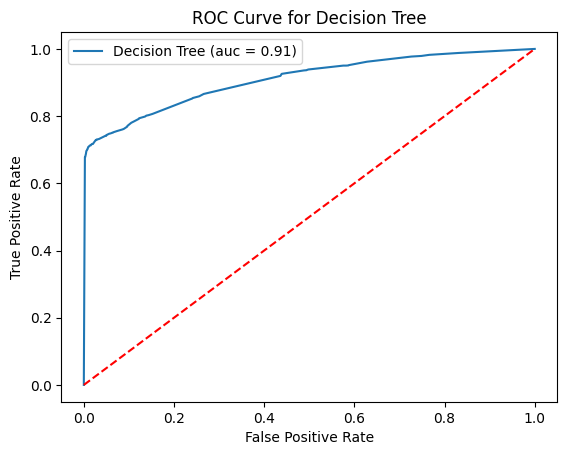

--- KNN ---
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7569
           1       0.95      0.57      0.71      2156

    accuracy                           0.90      9725
   macro avg       0.92      0.78      0.82      9725
weighted avg       0.90      0.90      0.89      9725

AUC Score: 0.9017641899839964


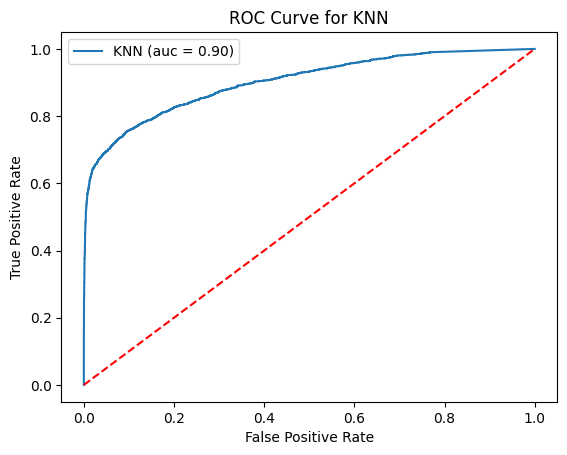

--- Neural Network ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7569
           1       0.91      0.70      0.79      2156

    accuracy                           0.92      9725
   macro avg       0.91      0.84      0.87      9725
weighted avg       0.92      0.92      0.91      9725

AUC Score: 0.9182799015905861


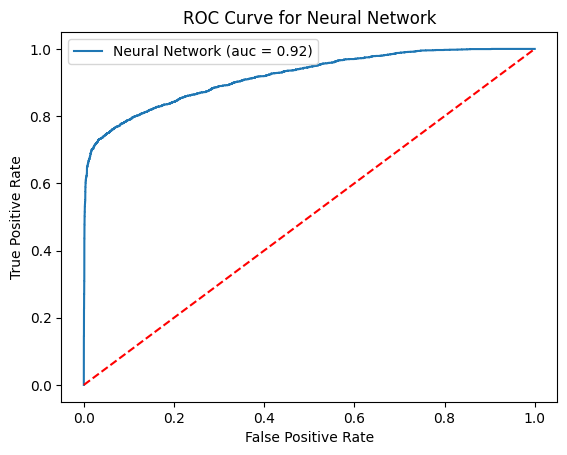

--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7569
           1       0.97      0.72      0.83      2156

    accuracy                           0.93      9725
   macro avg       0.95      0.86      0.89      9725
weighted avg       0.93      0.93      0.93      9725

AUC Score: 0.9365120728506154


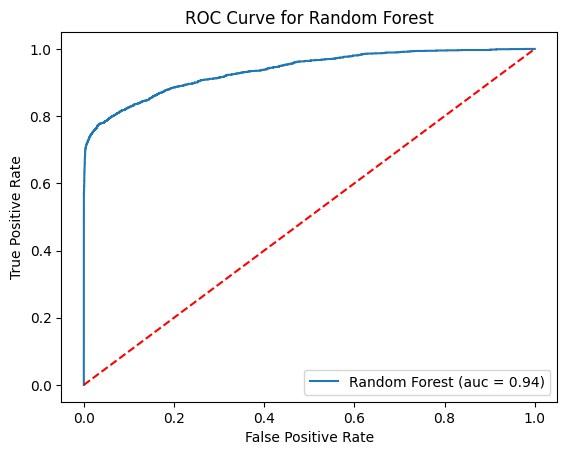

--- Gradient Boosting ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7569
           1       0.96      0.74      0.84      2156

    accuracy                           0.94      9725
   macro avg       0.94      0.87      0.90      9725
weighted avg       0.94      0.94      0.93      9725

AUC Score: 0.9503838648564314


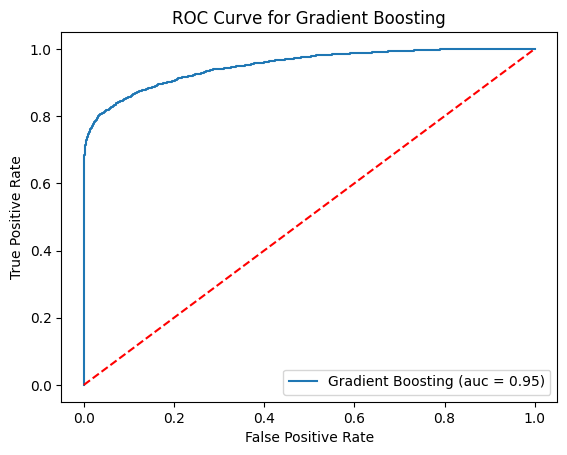

In [281]:
# Model evaluation
for name, model in models_final.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probabilities)
    print(f"--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print(f"AUC Score: {auc}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (auc = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'ROC Curve for {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

In [308]:
model_metrics_final1 = {}
for name, model in models_final.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Gather metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']
    auc = roc_auc_score(y_test, y_proba)

    model_metrics_final1[name] = {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    }

In [309]:
print(model_metrics_final1)

{'Decision Tree': {'Model': 'Decision Tree', 'Accuracy': 0.9280205655526992, 'Precision': 0.9395542209000145, 'Recall': 0.8491061271552184, 'F1-Score': 0.8843736730360934, 'AUC': 0.9089907789585043}, 'KNN': {'Model': 'KNN', 'Accuracy': 0.8979948586118252, 'Precision': 0.9214287849581537, 'Recall': 0.7798954626710699, 'F1-Score': 0.8248333163865607, 'AUC': 0.9017641899839964}, 'Neural Network': {'Model': 'Neural Network', 'Accuracy': 0.9179434447300772, 'Precision': 0.9130610310287449, 'Recall': 0.8411396843535455, 'F1-Score': 0.8702782801723706, 'AUC': 0.9182799015905861}, 'Random Forest': {'Model': 'Random Forest', 'Accuracy': 0.9324421593830334, 'Precision': 0.946775556636039, 'Recall': 0.8560929614522277, 'F1-Score': 0.8916303153122647, 'AUC': 0.9365120728506154}, 'Gradient Boosting': {'Model': 'Gradient Boosting', 'Accuracy': 0.9355269922879177, 'Precision': 0.943362517815592, 'Recall': 0.8670307383573903, 'F1-Score': 0.8981760843236934, 'AUC': 0.9505206399210137}}


In [311]:
model_metrics_final.update(model_metrics_final1)
print(model_metrics_final)

{'Logistic Regression': {'Model': 'Logistic Regression', 'Accuracy': 0.850694087403599, 'Precision': 0.8070541688467886, 'Recall': 0.7239671460412075, 'F1-Score': 0.7521028779639793, 'AUC': 0.8667073069994761}, 'Naive Bayes': {'Model': 'Naive Bayes', 'Accuracy': 0.8319794344473008, 'Precision': 0.792280697702221, 'Recall': 0.6674960799727234, 'F1-Score': 0.6972889860978844, 'AUC': 0.8352824086432036}, 'Decision Tree': {'Model': 'Decision Tree', 'Accuracy': 0.9280205655526992, 'Precision': 0.9395542209000145, 'Recall': 0.8491061271552184, 'F1-Score': 0.8843736730360934, 'AUC': 0.9089907789585043}, 'KNN': {'Model': 'KNN', 'Accuracy': 0.8979948586118252, 'Precision': 0.9214287849581537, 'Recall': 0.7798954626710699, 'F1-Score': 0.8248333163865607, 'AUC': 0.9017641899839964}, 'Neural Network': {'Model': 'Neural Network', 'Accuracy': 0.9179434447300772, 'Precision': 0.9130610310287449, 'Recall': 0.8411396843535455, 'F1-Score': 0.8702782801723706, 'AUC': 0.9182799015905861}, 'Random Forest':

### The comparison when the final model has been built after feature selection and hyperparameter tuning

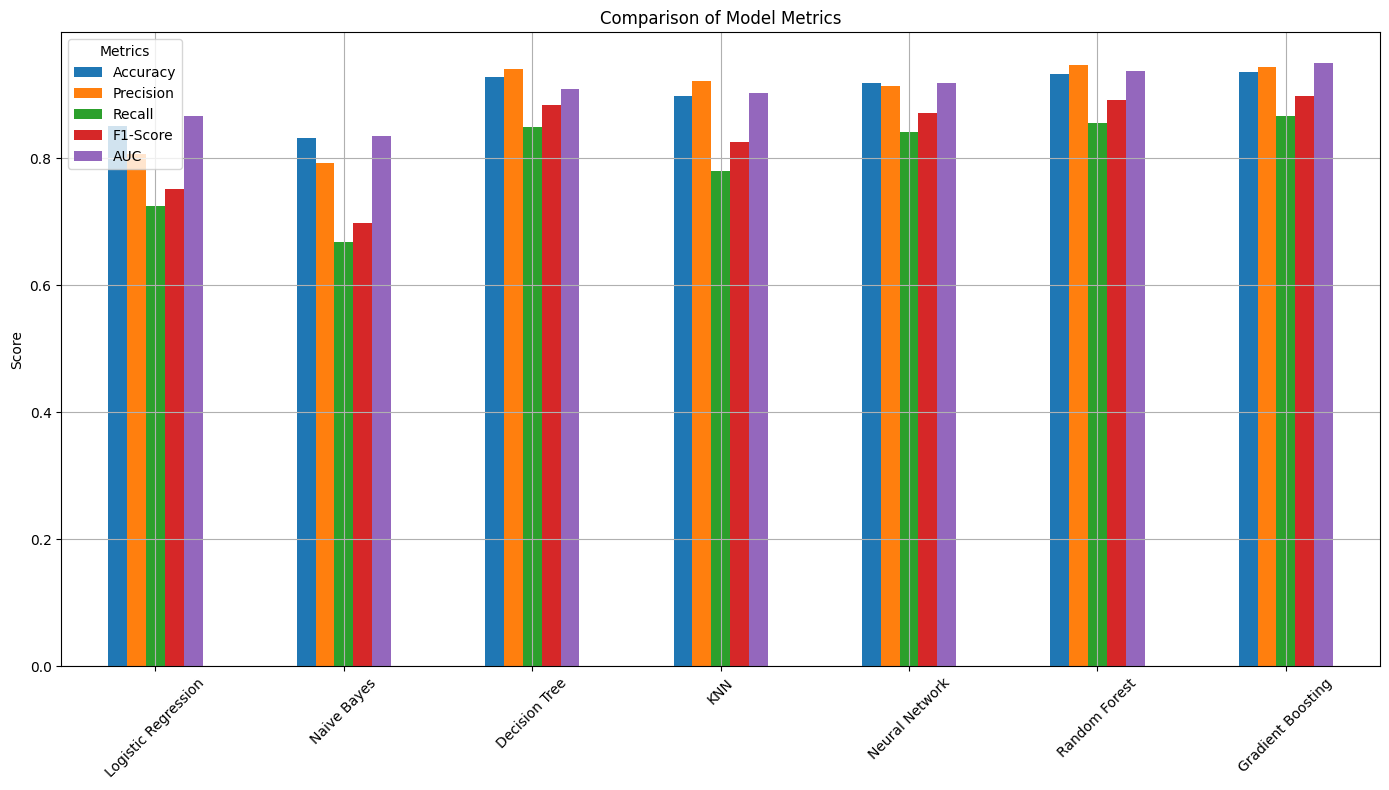

In [312]:
# Plotting the metrics

metrics_df_final = pd.DataFrame(model_metrics_final).T
fig, ax = plt.subplots(figsize=(14, 8))
metrics_df_final.plot(kind='bar', ax=ax)
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

The model metrics before feature selection and hyperparameter tuning was been applied

In [313]:
print(metrics_df)

                                   Model  Accuracy Precision    Recall  \
Logistic Regression  Logistic Regression  0.850283  0.806112  0.723537   
Decision Tree              Decision Tree  0.888432   0.83642  0.844239   
Naive Bayes                  Naive Bayes  0.805758  0.726799   0.76343   
KNN                                  KNN  0.890488  0.882618  0.784361   
Neural Network            Neural Network  0.919589  0.915181  0.844187   
Random Forest              Random Forest  0.933265  0.947073  0.858114   
Gradient Boosting      Gradient Boosting  0.924627  0.931227  0.845765   

                     F1-Score       AUC  
Logistic Regression  0.751527  0.866757  
Decision Tree         0.84022  0.844239  
Naive Bayes          0.740673  0.836107  
KNN                  0.819454  0.861912  
Neural Network       0.873079  0.919214  
Random Forest        0.893166  0.932558  
Gradient Boosting    0.879387  0.930351  



The model metrics after feature selection and hyperparameter tuning has been applied

In [314]:
print(metrics_df_final)

                                   Model  Accuracy Precision    Recall  \
Logistic Regression  Logistic Regression  0.850694  0.807054  0.723967   
Naive Bayes                  Naive Bayes  0.831979  0.792281  0.667496   
Decision Tree              Decision Tree  0.928021  0.939554  0.849106   
KNN                                  KNN  0.897995  0.921429  0.779895   
Neural Network            Neural Network  0.917943  0.913061   0.84114   
Random Forest              Random Forest  0.932442  0.946776  0.856093   
Gradient Boosting      Gradient Boosting  0.935527  0.943363  0.867031   

                     F1-Score       AUC  
Logistic Regression  0.752103  0.866707  
Naive Bayes          0.697289  0.835282  
Decision Tree        0.884374  0.908991  
KNN                  0.824833  0.901764  
Neural Network       0.870278   0.91828  
Random Forest         0.89163  0.936512  
Gradient Boosting    0.898176  0.950521  


A comparison between both in a dataframe

In [316]:
comparison_df = pd.concat([metrics_df.set_index('Model'), metrics_df_final.set_index('Model')], axis=1, keys=['Before Feature Selection and Hyperparameter Tuning', 'After Feature Selection and Hyperparameter Tuning'])
print(comparison_df)

                    Before Feature Selection and Hyperparameter Tuning  \
                                                              Accuracy   
Model                                                                    
Logistic Regression                                           0.850283   
Decision Tree                                                 0.888432   
Naive Bayes                                                   0.805758   
KNN                                                           0.890488   
Neural Network                                                0.919589   
Random Forest                                                 0.933265   
Gradient Boosting                                             0.924627   

                                                             \
                    Precision    Recall  F1-Score       AUC   
Model                                                         
Logistic Regression  0.806112  0.723537  0.751527  0.866757   
Decisio

# Feature Engineering

### Feature engineering to prove the hypothesis that borrowers with previous defaults are more likely to default again

In [326]:
# Logistic regression analysis

data['cb_person_default_on_file_Y'] = data['cb_person_default_on_file_Y'].astype(int)

X = data[['cb_person_default_on_file_Y']]  # 'Y' indicates a history of default
X = sm.add_constant(X)  # adding a constant
y = data['loan_status']

model_test1 = sm.Logit(y, X)
result1 = model_test1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.510690
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32416
Model:                          Logit   Df Residuals:                    32414
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 May 2024   Pseudo R-squ.:                 0.02771
Time:                        11:09:37   Log-Likelihood:                -16555.
converged:                       True   LL-Null:                       -17026.
Covariance Type:            nonrobust   LLR p-value:                3.490e-207
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4873      0.016    -94.209      0.000   

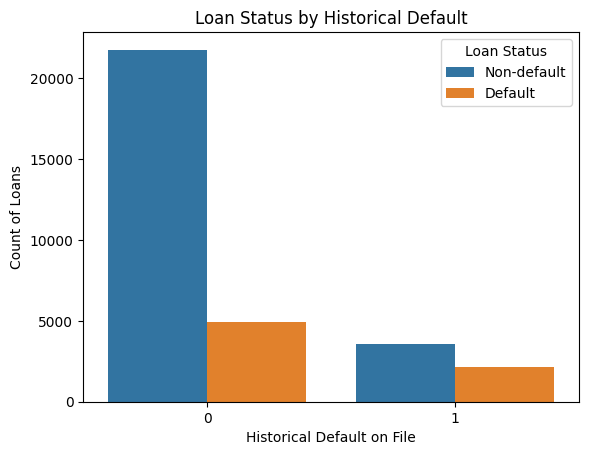

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the relationship between historical default and default status
sns.countplot(x='cb_person_default_on_file_Y', hue='loan_status', data= data)
plt.title('Loan Status by Historical Default')
plt.xlabel('Historical Default on File')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status', labels=['Non-default', 'Default'])
plt.show()

### Feature engineering to prove the hypothesis that a persons income and employment length shows the likeliness of the borrower to default

In [319]:
X = data[['person_income', 'person_emp_length']] # independent variables used to check hypothesis
X = sm.add_constant(X)  # Adding a constant for the intercept
y = data['loan_status']

# Fit the logistic regression model
model_test2 = sm.Logit(y, X)
result2 = model_test2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.495099
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32416
Model:                          Logit   Df Residuals:                    32413
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 May 2024   Pseudo R-squ.:                 0.05739
Time:                        11:00:36   Log-Likelihood:                -16049.
converged:                       True   LL-Null:                       -17026.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0304      0.033     -0.920      0.357      -0.095       0.034
person_i

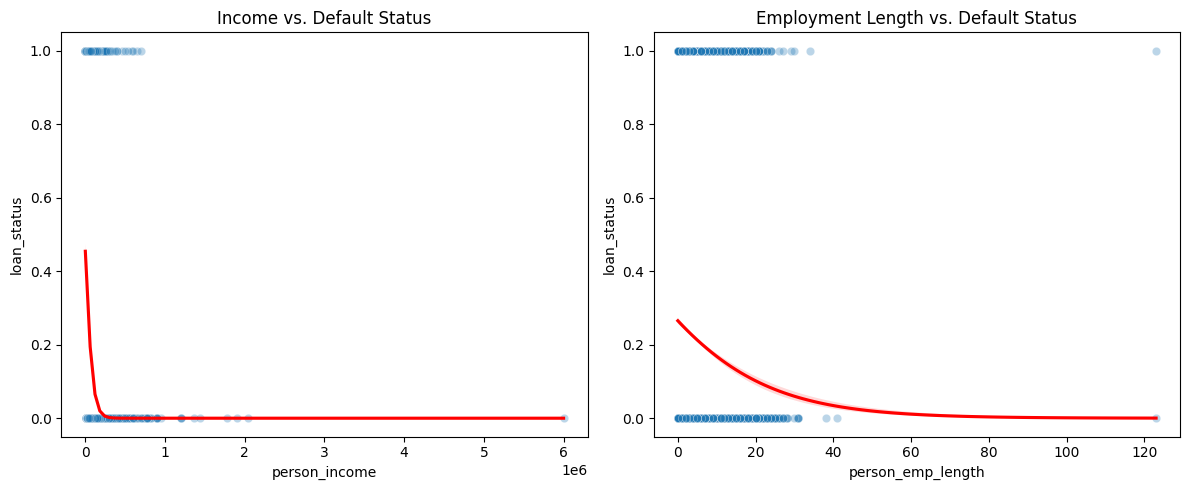

In [329]:
# Scatter plot for income
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='person_income', y='loan_status', data=data, alpha=0.3)
sns.regplot(x='person_income', y='loan_status', data=data, logistic=True, scatter=False, color='red')
plt.title('Income vs. Default Status')

# Scatter plot for employment length
plt.subplot(1, 2, 2)
sns.scatterplot(x='person_emp_length', y='loan_status', data=data, alpha=0.3)
sns.regplot(x='person_emp_length', y='loan_status', data=data, logistic=True, scatter=False, color='red')
plt.title('Employment Length vs. Default Status')

plt.tight_layout()
plt.show()